In [1]:
%pylab inline
import numpy as np
import scipy.signal as ss
import scipy.misc as sm
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lpKernel(N, freq):
#
# Lowpass filter 1D MAXFLAT kernel generator
#
# N is the filter half-size, must be odd
# freq is the normalised cutoff frequency
#
# Returns the filter kernel of size (2N+1)
#
    num = 2*N + 1
    result = np.zeros((num,1))
    for n in range(N+1):
        i = n+N
        im = N-n
        if (n==0):
            result[i] = freq
        else:
            p = n%2
            val = (sm.factorial2(N)**2 * np.pi**(p-1) * np.sin(n*np.pi*freq)) / ( 2**p * n * sm.factorial2(i) * sm.factorial2(im) )  
            result[i] = val
            result[im] = val
    return result/np.sum(result)

def chilbKernel(N, band=0.9):
#
# Complex hilbert transformer kernel
#
#
    x = np.linspace(-N,N,2*N+1) * np.pi /2.0 * 1j
    result = ss.firwin(2*N+1,band/2, window="nuttall") * np.exp(x)
    return result

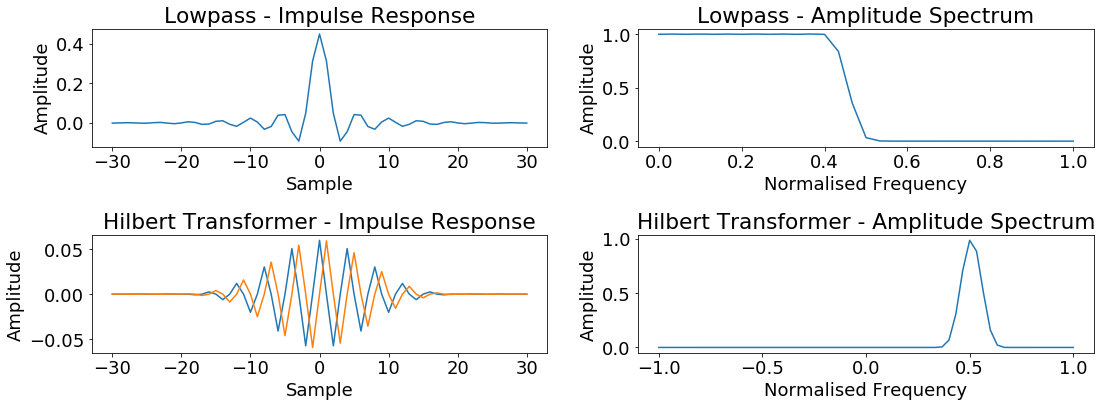

In [10]:
N = 30
Np = 2*N+1
matplotlib.rcParams.update({'font.size': 18})
fig,axes = plt.subplots( 2, 2, figsize=(16,6) )

kernel = lpKernel(N, 0.1)
kernel = ss.firwin(Np,0.45)
fft = np.fft.rfft(kernel)

axes[0,0].plot(np.linspace(-N,N,Np), kernel)
axes[0,0].set_xlabel('Sample')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].set_title('Lowpass - Impulse Response')
axes[0,1].plot(np.linspace(0,1,N+1),np.abs(fft))
axes[0,1].set_xlabel('Normalised Frequency')
axes[0,1].set_ylabel('Amplitude')
axes[0,1].set_title('Lowpass - Amplitude Spectrum')

kernel = chilbKernel(N,band=0.1)
fft = np.fft.fftshift(np.fft.fft(kernel))
axes[1,0].plot(np.linspace(-N,N,2*N+1), np.real(kernel))
axes[1,0].plot(np.linspace(-N,N,2*N+1), np.imag(kernel))
axes[1,0].set_xlabel('Sample')
axes[1,0].set_ylabel('Amplitude')
axes[1,0].set_title('Hilbert Transformer - Impulse Response')
axes[1,1].plot(np.linspace(-1,1,Np),np.abs(fft))
axes[1,1].set_xlabel('Normalised Frequency')
axes[1,1].set_ylabel('Amplitude')
axes[1,1].set_title('Hilbert Transformer - Amplitude Spectrum')

fig.tight_layout()